# Figure S13: Modulations of run duration parameters and running speed by action cost in dStr-lesioned rats 

## setup and imports

In [11]:
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [12]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [13]:
rat_markers = {}
sequence = {}

# INTACT RATS
animalList = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42',
            'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52']
x = 0
palette = create_kiwi_green_palette(num_shades=len(animalList))
for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    if fnmatch.fnmatch(animal, 'Rat*'):
        rat_markers[animal]=[palette[x], 'o']
        x += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")
   
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")

rat_markers['RatM00'] = ['orange', 'o', '-']

Loading data for RatF30
Loading data for RatF31
Loading data for RatM30
Loading data for RatF40
Loading data for RatF41
Loading data for RatM41
Loading data for RatM42
Loading data for RatF50
Loading data for RatF51
Loading data for RatF52
Loading data for RatM50
Loading data for RatM51
Loading data for RatM52


# S13A Schematics of three action cost conditions with increasing platform distances
# S13E Same with treadmill belt velocity

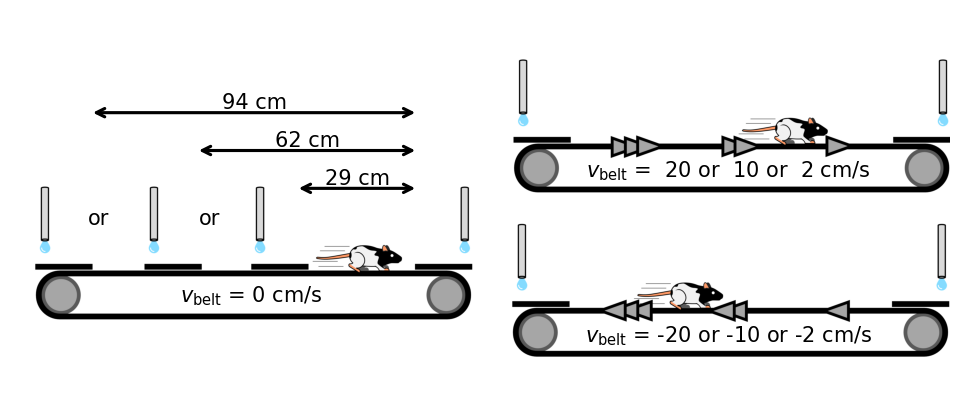

In [14]:
def FigureS13A(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "Figures/4Arun.png"

    img = plt.imread(path)
    img = img[300:2600, 150:3075]

    # add 300 above the image so same size as the other image
    img = np.concatenate((np.ones((300, img.shape[1], 3), dtype=np.uint8), img), axis=0)
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ = 0 cm/s', x=img.shape[1]/2, y=1760, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=450, y=1250, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=1185, y=1250, ha="center", va="center", fontsize=5)

    ax.annotate(text='', xy=(1720, 1050), xytext=(2600, 1050), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='', xy=(1060, 800), xytext=(2600, 800), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='', xy=(360, 550), xytext=(2600, 550), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    
    ax.annotate(text='29 cm', xy=(0, 0), xytext=((1720+2600)/2, 1050), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='62 cm', xy=(0, 0), xytext=((1060+2600)/2, 800), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='94 cm', xy=(0, 0), xytext=((360+2600)/2, 550), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)


def FigureS13E(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "Figures/4Drun.png"

    img = plt.imread(path)
    img = img[:, 150:3075]
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ =  20 or  10 or  2 cm/s', x=img.shape[1]/2, y=930, ha="center", va="center", fontsize=5)
    ax.text(s=r'$v_{\mathrm{belt}}$ = -20 or -10 or -2 cm/s', x=img.shape[1]/2, y=2020, ha="center", va="center", fontsize=5)


fig, axs = plt.subplots(1, 2, figsize=(cm2inch(8), cm2inch(4)))
FigureS13A(ax=axs[0])
FigureS13E(ax=axs[1])

# S13B Effect of distance on μ0, μt and μu

$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.274, obs_intercept=0.926
$\mu_t$: p_s=0.164, p_i=0.000, obs_slope=0.009, obs_intercept=0.044
$\mu_u$: p_s=0.590, p_i=0.157, obs_slope=-0.003, obs_intercept=0.010


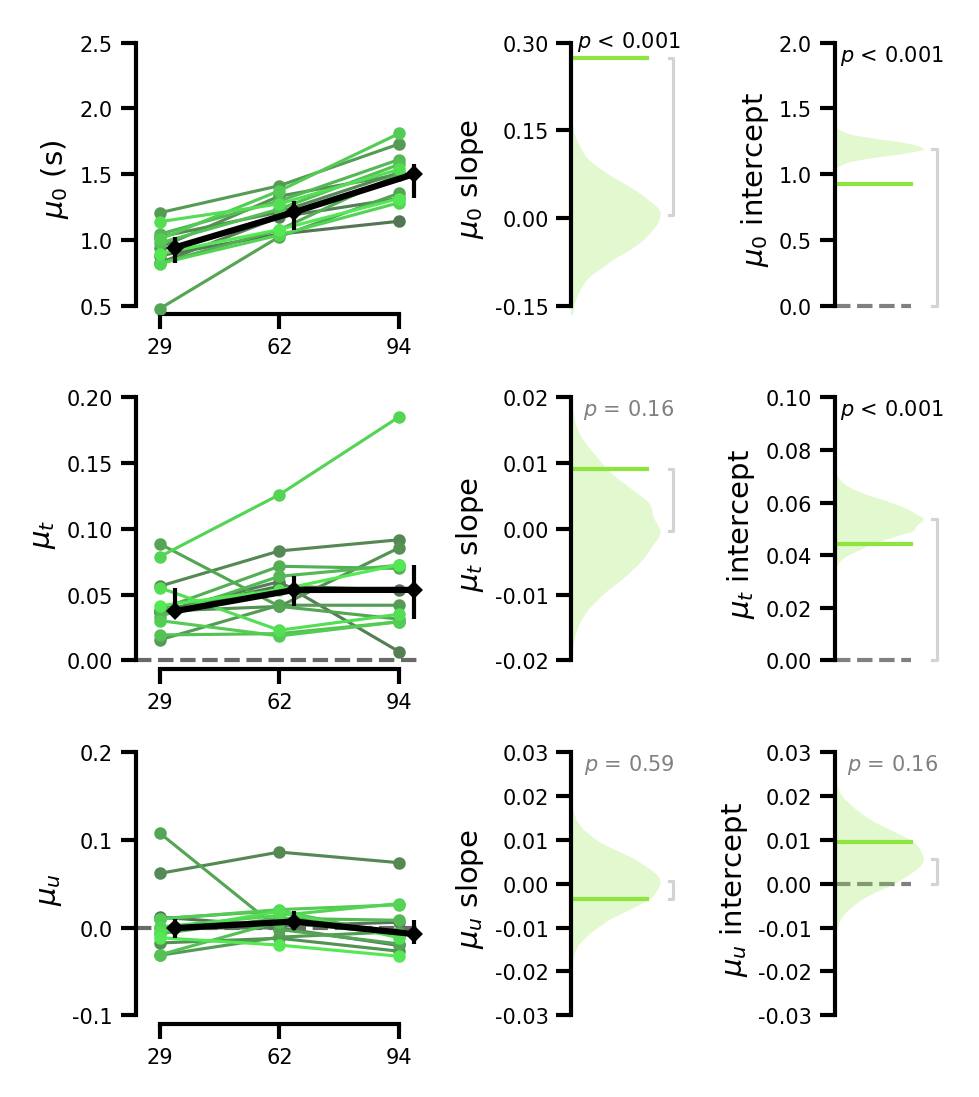

In [15]:
def FigureS13B_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_0[animal]["60"], mu_0[animal]["90"], mu_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder=5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(0.5, 2.5)
    ax.set_yticks([.5, 1, 1.5, 2, 2.5])
    ax.set_ylabel(r'$\mu_0$' + ' (s)')
    
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_0, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS13B_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_t[animal]["60"], mu_t[animal]["90"], mu_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder=5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.0, .2)
    ax.set_yticks([0, 0.05, .10, .15, .2])
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_t, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS13B_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_u[animal]["60"], mu_u[animal]["90"], mu_u[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder=5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-.1, .2)
    ax.set_yticks([-.1, 0.0, .1, .2])
    ax.set_ylabel(r'$\mu_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_u, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')


def FigureS13B_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(mu_0, dist_or_tm='dist', varname=r'$\mu_0$', lesioned_animals=True, raisy=.05,
                        ax_slope=ax_slope, yticks_slope=[-0.15, 0, 0.15, 0.3], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .5, 1, 1.5, 2])

def FigureS13B_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_t, dist_or_tm='dist', varname=r'$\mu_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.02, -.01, 0, .01, .02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .02, .04, .06, .08, .1])

def FigureS13B_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_u, dist_or_tm='dist', varname=r'$\mu_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03])


fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS13B_zero(axs[0, 0])
FigureS13B_t(axs[1, 0])
FigureS13B_u(axs[2, 0])


FigureS13B_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS13B_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS13B_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])


# S13C Median running speed across action cost conditions

Run speed: p_s=0.000, p_i=0.000, obs_slope=15.588, obs_intercept=35.315


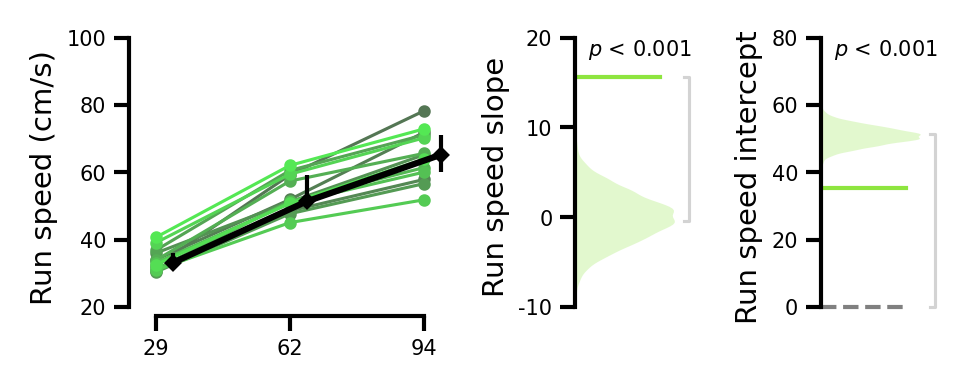

In [16]:
def FigureS13C(root, ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["60", "90", "120"]
    run_speeds = {k: {a: [] for a in conds} for k in animalList}
    run_speeds2 = {k: {a: [] for a in conds} for k in animalList}

    for cond, sessionlist in zip(conds, [dist60, dist90, dist120]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if get_block(sequence[animal, session][elem][0]) <= 1:
                        if sequence[animal, session][elem][1] == 'run':
                            tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                            run_speeds[animal][cond].append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    for animal in animalList:
        for cond in conds:
            run_speeds2[animal][cond] = np.median(run_speeds[animal][cond])

    for animal in animalList:
        ax.plot([0, 1, 2], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2, 
                label=f'Individuals (n={len(animalList)})', lw=.75, zorder=5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")
    ax.set_ylim(20, 100)
    ax.set_yticks([20, 40, 60, 80, 100, ])
    ax.set_ylabel("Run speed (cm/s)")

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(run_speeds2, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')
    return run_speeds2

def FigureS13C_stats(var, ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    regression_permutation(var, dist_or_tm='dist', varname='Run speed', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-10, 0, 10, 20],
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 20, 40, 60, 80])

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(8), cm2inch(3)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
run_speeds = FigureS13C(root, ax=axs[0])
FigureS13C_stats(run_speeds, ax_slope=axs[1], ax_intercept=axs[2])

# S13D Same as B for σ

$\sigma_0$: p_s=0.670, p_i=0.000, obs_slope=-0.003, obs_intercept=0.096
$\sigma_t$: p_s=0.849, p_i=0.010, obs_slope=0.000, obs_intercept=0.004
$\sigma_u$: p_s=0.578, p_i=0.000, obs_slope=0.002, obs_intercept=0.024


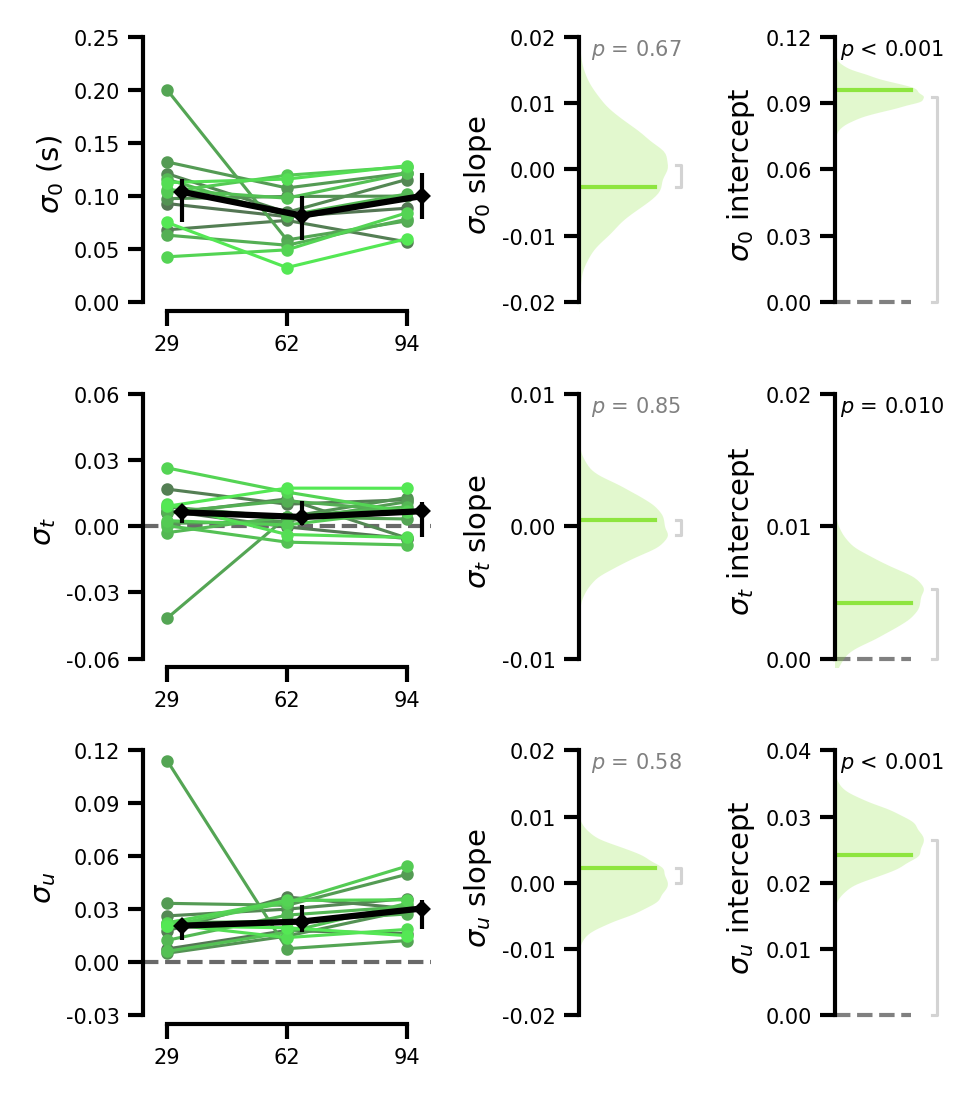

In [17]:
def FigureS13D_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [sigma_0[animal]["60"], sigma_0[animal]["90"], sigma_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(0, .25)
    ax.set_yticks([0, .05, .1, .15, .2, .25])
    ax.set_ylabel(r'$\sigma_0$' + ' (s)')

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_0, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')
        
def FigureS13D_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [sigma_t[animal]["60"], sigma_t[animal]["90"], sigma_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.06, .06)
    ax.set_yticks([-.06, -.03, 0, .03, 0.06])
    ax.set_ylabel(r'$\sigma_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_t, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS13D_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [sigma_u[animal]["60"], sigma_u[animal]["90"], sigma_u[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-.03, .12)
    ax.set_yticks([-.03, 0, .03, .06, .09, .12])
    ax.set_ylabel(r'$\sigma_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_u, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')


def FigureS13D_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(sigma_0, dist_or_tm='dist', varname=r'$\sigma_0$', lesioned_animals=True, 
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .03, 0.06, .09, .12])

def FigureS13D_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_t, dist_or_tm='dist', varname=r'$\sigma_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.01, 0, .01], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .01, .02])

def FigureS13D_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_u, dist_or_tm='dist', varname=r'$\sigma_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 0.01, 0.02, 0.03, 0.04])


fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS13D_zero(ax=axs[0, 0])
FigureS13D_t(ax=axs[1, 0])
FigureS13D_u(ax=axs[2, 0])

FigureS13D_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS13D_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS13D_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])


# S13F Same as B for treadmill belt velocity

$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.103, obs_intercept=1.389
$\mu_t$: p_s=0.083, p_i=0.000, obs_slope=0.004, obs_intercept=0.051
$\mu_u$: p_s=0.272, p_i=0.157, obs_slope=-0.004, obs_intercept=0.017


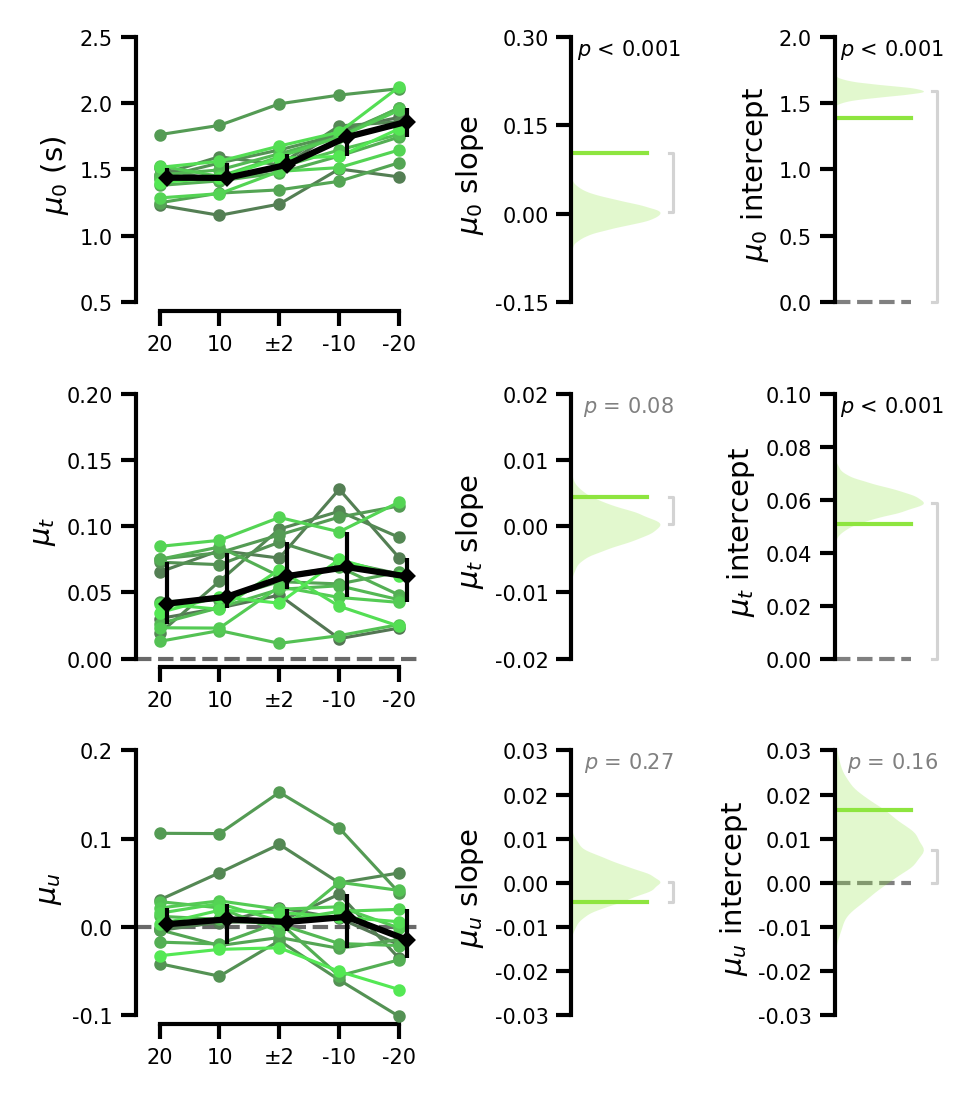

In [18]:
def FigureS13F_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_0[animal]["20"], mu_0[animal]["10"], mu_0[animal]["2"], mu_0[animal]["rev10"], mu_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder=5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(0.5, 2.5)
    ax.set_yticks([.5, 1, 1.5, 2, 2.5])
    ax.set_ylabel(r'$\mu_0$' + ' (s)')
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_0, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS13F_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_t[animal]["20"], mu_t[animal]["10"], mu_t[animal]["2"], mu_t[animal]["rev10"], mu_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder=5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(.0, .2)
    ax.set_yticks([0, 0.05, .1, .15, .2, ])
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_t, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS13F_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_u[animal]["20"], mu_u[animal]["10"], mu_u[animal]["2"], mu_u[animal]["rev10"], mu_u[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder=5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-.1, .2)
    ax.set_yticks([-.1, 0.0, .1, .2])
    ax.set_ylabel(r'$\mu_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(mu_u, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')



def FigureS13F_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(mu_0, dist_or_tm='tm', varname=r'$\mu_0$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.15, 0, 0.15, 0.3], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .5, 1, 1.5, 2])

def FigureS13F_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_t, dist_or_tm='tm', varname=r'$\mu_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.02, -.01, 0, .01, .02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .02, .04, .06, .08, .1])

def FigureS13F_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, mu_u, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(mu_u, dist_or_tm='tm', varname=r'$\mu_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[-0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03])

fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS13F_zero(axs[0, 0])
FigureS13F_t(axs[1, 0])
FigureS13F_u(axs[2, 0])

FigureS13F_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS13F_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS13F_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])

# S13G same as S13C for treadmill belt velocity

Run speed: p_s=0.000, p_i=0.000, obs_slope=6.463, obs_intercept=48.832


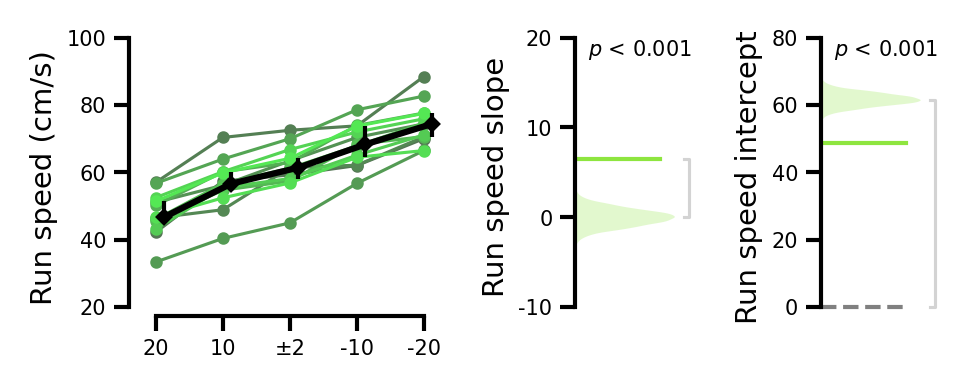

In [19]:
def FigureS13G(root, ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["20", "10", "2", "rev10", "rev20"]
    run_speeds = {k: {a: [] for a in conds} for k in animalList}
    run_speeds2 = {k: {a: [] for a in conds} for k in animalList}

    for cond, sessionlist in zip(conds, [TM20, TM10, TM2, TMrev10, TMrev20]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if get_block(sequence[animal, session][elem][0]) <= 1:
                        if sequence[animal, session][elem][1] == 'run':
                            tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                            run_speeds[animal][cond].append(abs(sequence[animal, session][elem][-1]) - tm_speed)

    for animal in animalList:
        for cond in conds:
            run_speeds2[animal][cond] = np.median(run_speeds[animal][cond])

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [np.median(run_speeds[animal][cond]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=2, lw=.75, zorder=8)
        

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(20, 100)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_ylabel("Run speed (cm/s)")

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(run_speeds2, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')
    return run_speeds2

def FigureS13G_stats(var, ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    regression_permutation(var, dist_or_tm='tm', varname='Run speed', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-10, 0, 10, 20],
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 20, 40, 60, 80])

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(8), cm2inch(3)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
run_speeds = FigureS13G(root, ax=axs[0])
FigureS13G_stats(run_speeds, ax_slope=axs[1], ax_intercept=axs[2])

# S13H same as S13D for treadmill belt velocity

$\sigma_0$: p_s=0.000, p_i=0.000, obs_slope=0.013, obs_intercept=0.076
$\sigma_t$: p_s=0.186, p_i=0.000, obs_slope=0.001, obs_intercept=0.003
$\sigma_u$: p_s=0.999, p_i=0.000, obs_slope=-0.000, obs_intercept=0.020


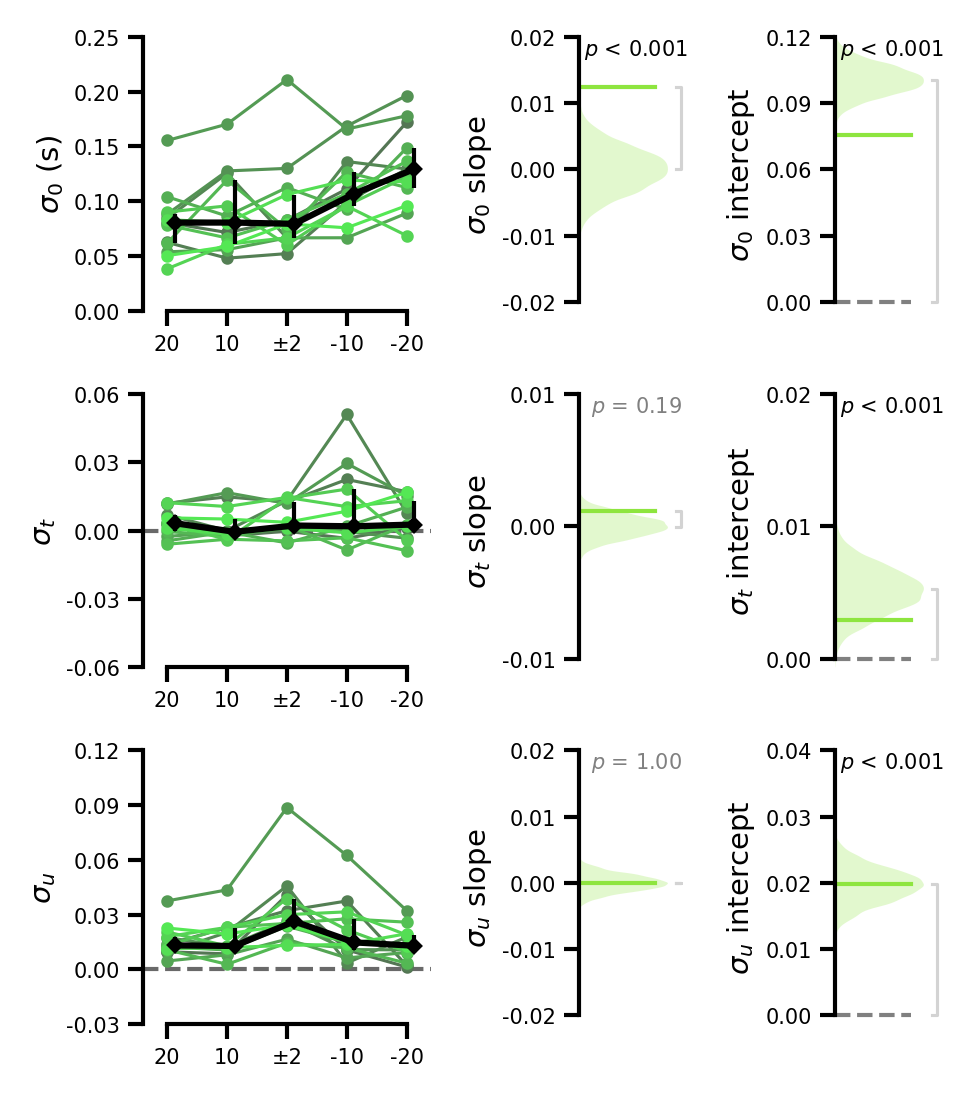

In [20]:
def FigureS13H_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [sigma_0[animal]["20"], sigma_0[animal]["10"], sigma_0[animal]["2"], sigma_0[animal]["rev10"], sigma_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2)
    
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(0, .25)
    ax.set_yticks([0, .05, .1, .15, .2, .25])
    ax.set_ylabel(r'$\sigma_0$' + ' (s)')
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_0, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS13H_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [sigma_t[animal]["20"], sigma_t[animal]["10"], sigma_t[animal]["2"], sigma_t[animal]["rev10"], sigma_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2)
        
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-0.06, .06)
    ax.set_yticks([-.06, -.03, 0, .03, 0.06])
    ax.set_ylabel(r'$\sigma_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_t, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS13H_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [sigma_u[animal]["20"], sigma_u[animal]["10"], sigma_u[animal]["2"], sigma_u[animal]["rev10"], sigma_u[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    if show_xlabel:
        _ = r'$v_{\mathrm{belt}}$'
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-.03, .12)
    ax.set_yticks([-.03, 0, .03, .06, .09, .12])
    ax.set_ylabel(r'$\sigma_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, zorder=0)
    space_axes(ax, y_ratio=0, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(sigma_u, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')


def FigureS13H_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, sigma_0, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(sigma_0, dist_or_tm='tm', varname=r'$\sigma_0$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .03, 0.06, .09, .12])

def FigureS13H_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, sigma_t, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_t, dist_or_tm='tm', varname=r'$\sigma_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.01, 0, .01], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .01, .02])

def FigureS13H_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, _, _, _, _, _, _, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(sigma_u, dist_or_tm='tm', varname=r'$\sigma_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.02, -0.01, 0, 0.01, 0.02], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, 0.01, 0.02, 0.03, 0.04])

fig, axs = plt.subplots(3, 3, figsize=(cm2inch(8), cm2inch(9)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS13H_zero(ax=axs[0, 0])
FigureS13H_t(ax=axs[1, 0])
FigureS13H_u(ax=axs[2, 0])

FigureS13H_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS13H_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS13H_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])


# Figure S13: Modulations of run duration parameters and running speed by action cost in dStr-lesioned rats

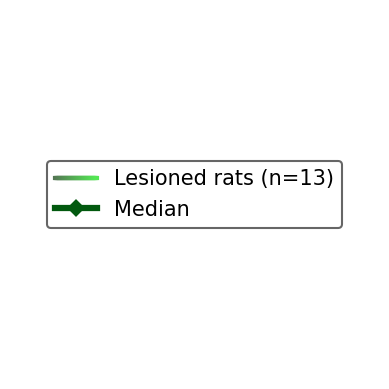

In [21]:
def dummy_legend(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    median_lesion = ax.plot([-100, -101], [-100, -101], color='xkcd:deep green', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median lesioned rats', zorder=5)
    
    add_colored_lesion(ax=ax, loc='center', bbox=(.5, .5),
                       handles=[median_lesion], labels=['Median'],
                       text=f'Lesioned rats (n={len(animalList)})')
    ax.axis('off')
    ax.set_xlim(10, 11)
    ax.set_ylim(10, 11)

fig, axs = plt.subplots(1, 1, figsize=(cm2inch(3), cm2inch(3)))
dummy_legend(ax=axs)

$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.274, obs_intercept=0.926
$\mu_t$: p_s=0.164, p_i=0.000, obs_slope=0.009, obs_intercept=0.044
$\mu_u$: p_s=0.590, p_i=0.157, obs_slope=-0.003, obs_intercept=0.010
Run speed: p_s=0.000, p_i=0.000, obs_slope=15.588, obs_intercept=35.315
$\mu_0$: p_s=0.000, p_i=0.000, obs_slope=0.103, obs_intercept=1.389
$\mu_t$: p_s=0.083, p_i=0.000, obs_slope=0.004, obs_intercept=0.051
$\mu_u$: p_s=0.272, p_i=0.157, obs_slope=-0.004, obs_intercept=0.017
Run speed: p_s=0.000, p_i=0.000, obs_slope=6.463, obs_intercept=48.832
$\sigma_0$: p_s=0.670, p_i=0.000, obs_slope=-0.003, obs_intercept=0.096
$\sigma_t$: p_s=0.849, p_i=0.010, obs_slope=0.000, obs_intercept=0.004
$\sigma_u$: p_s=0.578, p_i=0.000, obs_slope=0.002, obs_intercept=0.024
$\sigma_0$: p_s=0.000, p_i=0.000, obs_slope=0.013, obs_intercept=0.076
$\sigma_t$: p_s=0.186, p_i=0.000, obs_slope=0.001, obs_intercept=0.003
$\sigma_u$: p_s=0.999, p_i=0.000, obs_slope=-0.000, obs_intercept=0.020


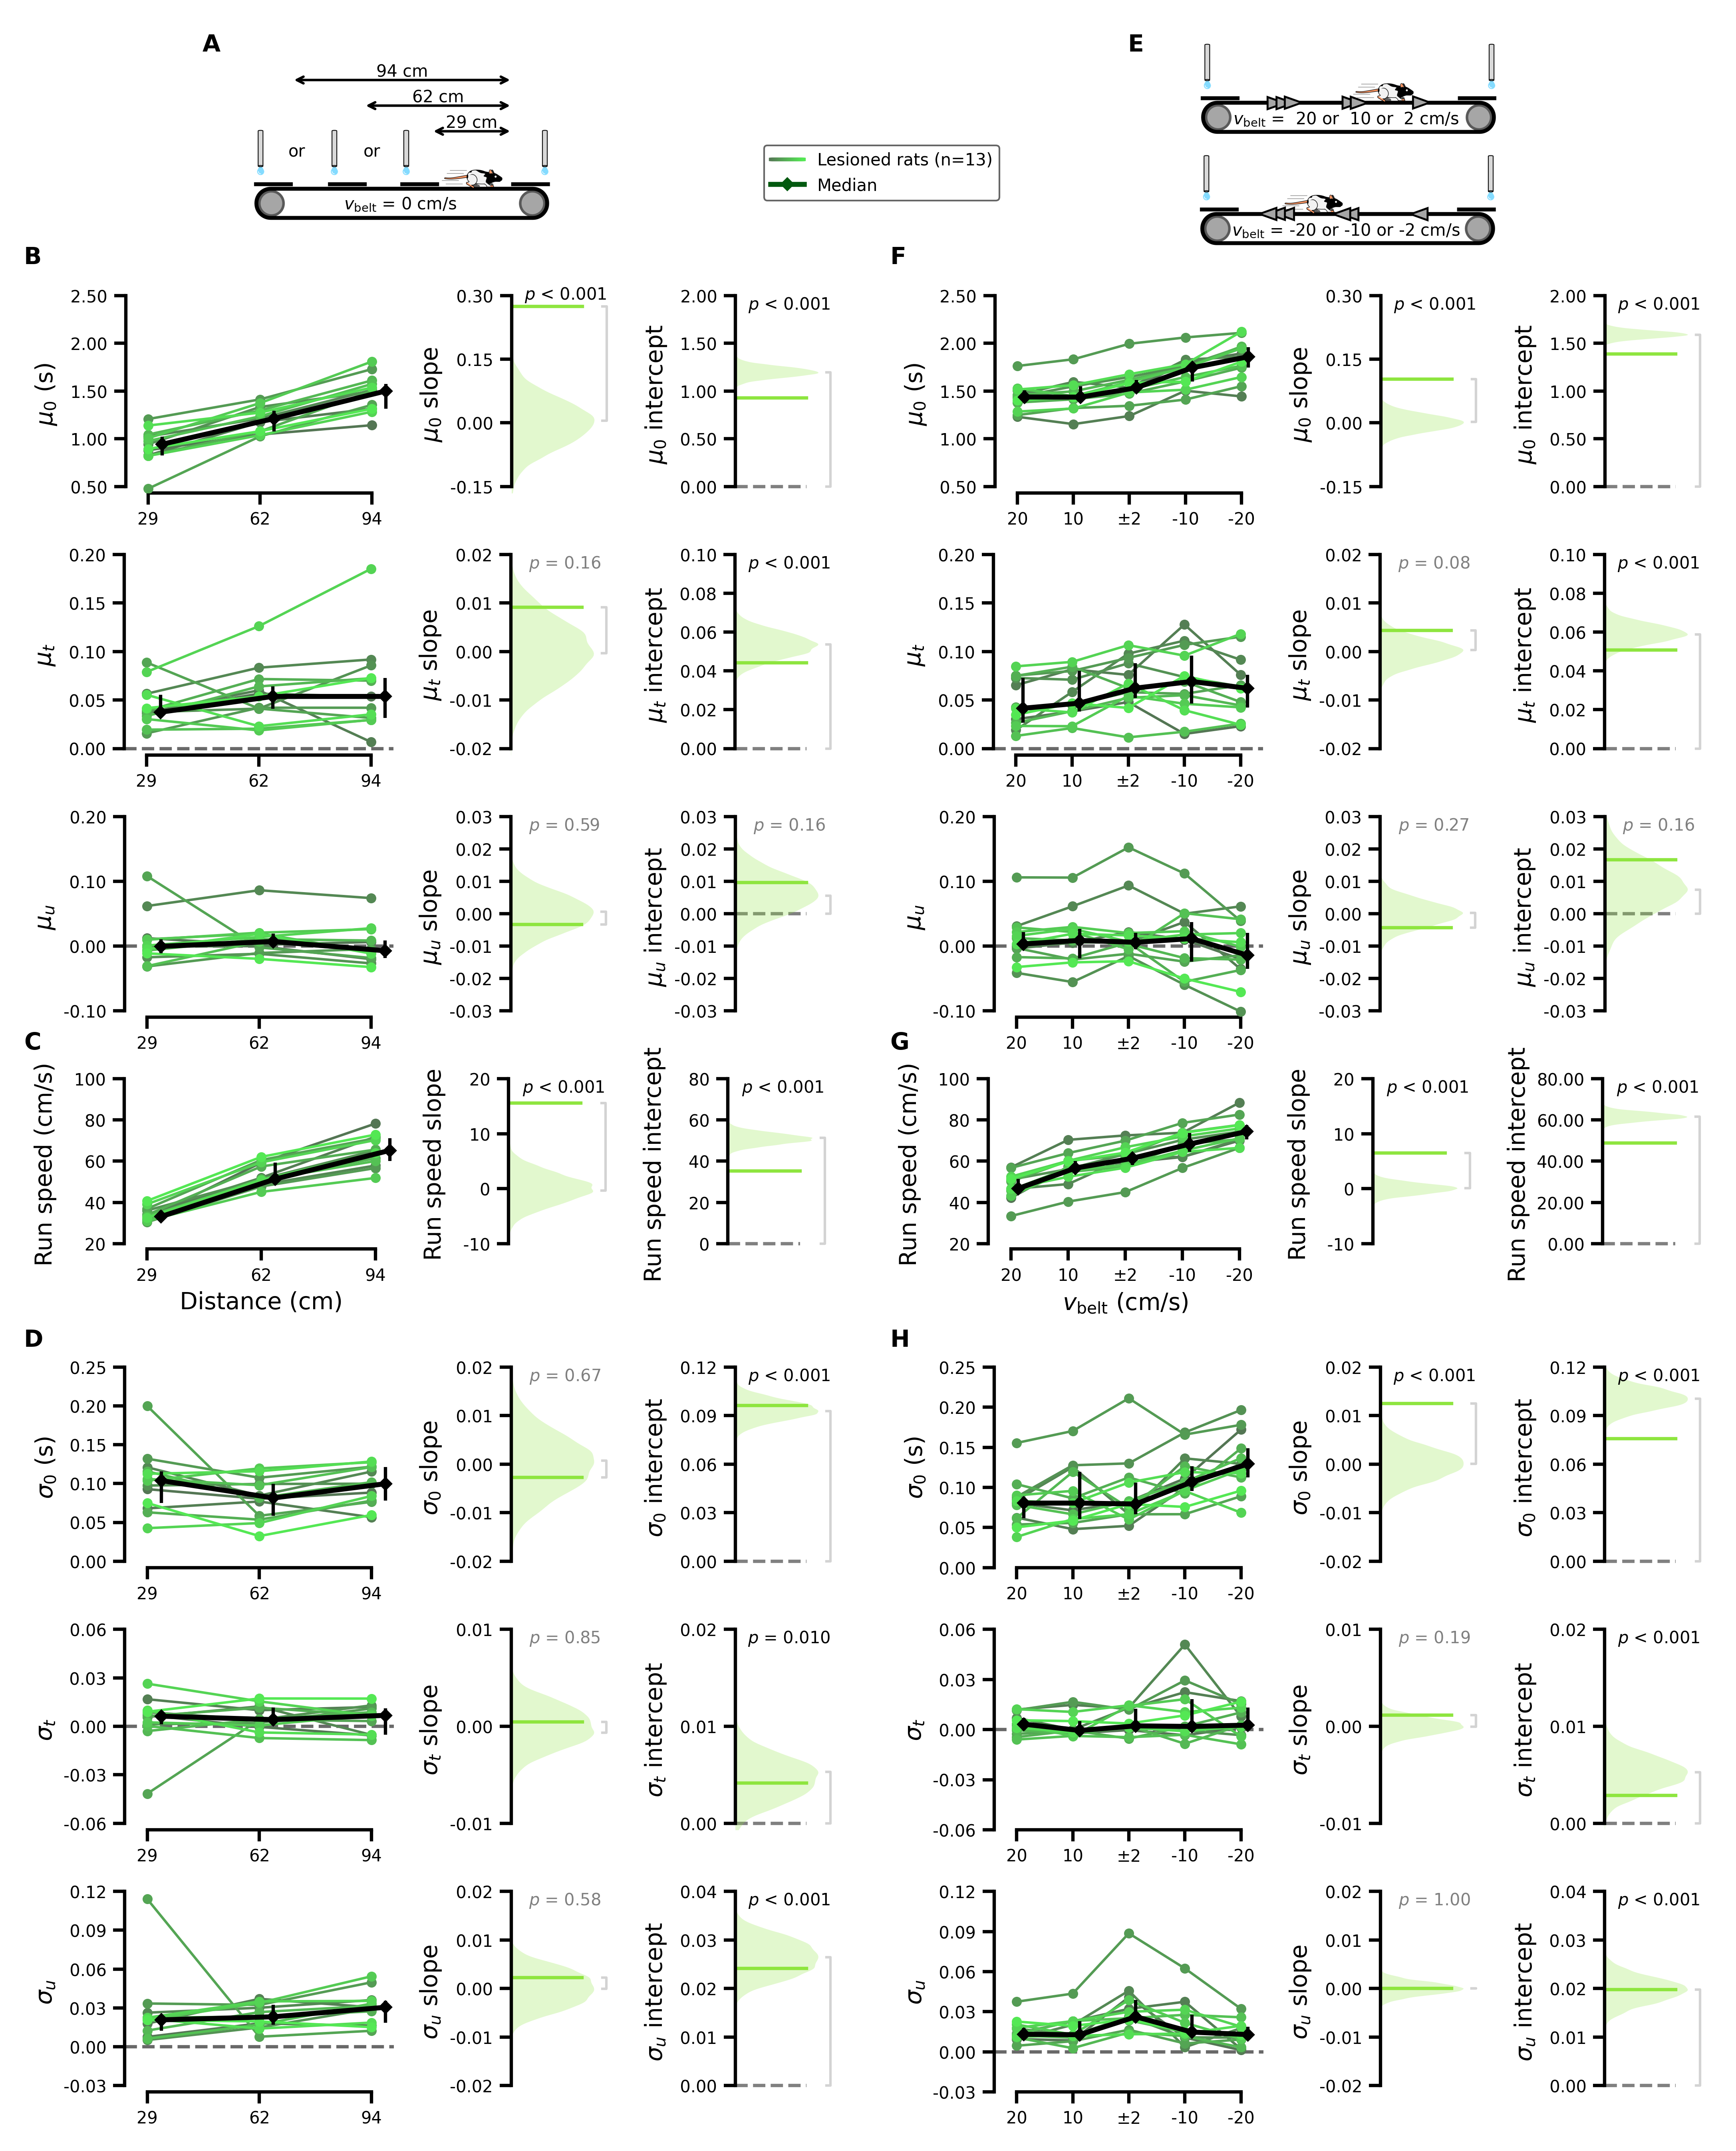

In [23]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(22.5)), constrained_layout=True, facecolor='w', dpi=600)

gs0 = fig.add_gridspec(9, 1, wspace=.5, hspace=.5, height_ratios=[1, 1, 1, 1, 1, .1, 1, 1, 1])

row2 = gs0[0].subgridspec(1, 3, wspace=.5, hspace=.5, width_ratios=[1, .2, 1])
schematic_distances = plt.subplot(row2[0])
schematic_vbelts = plt.subplot(row2[2])

row3 = gs0[1].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_mu_0_distance = plt.subplot(row3[0])
fit_mu_0_distance_slope = plt.subplot(row3[1])
fit_mu_0_distance_intercept = plt.subplot(row3[2])
fit_mu_0_vbelt = plt.subplot(row3[4])
fit_mu_0_vbelt_slope = plt.subplot(row3[5])
fit_mu_0_vbelt_intercept = plt.subplot(row3[6])

row4 = gs0[2].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_mu_t_distance = plt.subplot(row4[0])
fit_mu_t_distance_slope = plt.subplot(row4[1])
fit_mu_t_distance_intercept = plt.subplot(row4[2])
fit_mu_t_vbelt = plt.subplot(row4[4])
fit_mu_t_vbelt_slope = plt.subplot(row4[5])
fit_mu_t_vbelt_intercept = plt.subplot(row4[6])

row5 = gs0[3].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_mu_u_distance = plt.subplot(row5[0])
fit_mu_u_distance_slope = plt.subplot(row5[1])
fit_mu_u_distance_intercept = plt.subplot(row5[2])
fit_mu_u_vbelt = plt.subplot(row5[4])
fit_mu_u_vbelt_slope = plt.subplot(row5[5])
fit_mu_u_vbelt_intercept = plt.subplot(row5[6])

row6 = gs0[4].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
speed_distance = plt.subplot(row6[0])
speed_distance_slope = plt.subplot(row6[1])
speed_distance_intercept = plt.subplot(row6[2])
speed_vbelt = plt.subplot(row6[4])
speed_vbelt_slope = plt.subplot(row6[5])
speed_vbelt_intercept = plt.subplot(row6[6])


row7 = gs0[6].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_sigma_0_distance = plt.subplot(row7[0])
fit_sigma_0_distance_slope = plt.subplot(row7[1])
fit_sigma_0_distance_intercept = plt.subplot(row7[2])
fit_sigma_0_vbelt = plt.subplot(row7[4])
fit_sigma_0_vbelt_slope = plt.subplot(row7[5])
fit_sigma_0_vbelt_intercept = plt.subplot(row7[6])

row8 = gs0[7].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_sigma_t_distance = plt.subplot(row8[0])
fit_sigma_t_distance_slope = plt.subplot(row8[1])
fit_sigma_t_distance_intercept = plt.subplot(row8[2])
fit_sigma_t_vbelt = plt.subplot(row8[4])
fit_sigma_t_vbelt_slope = plt.subplot(row8[5])
fit_sigma_t_vbelt_intercept = plt.subplot(row8[6])

row9 = gs0[8].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_sigma_u_distance = plt.subplot(row9[0])
fit_sigma_u_distance_slope = plt.subplot(row9[1])
fit_sigma_u_distance_intercept = plt.subplot(row9[2])
fit_sigma_u_vbelt = plt.subplot(row9[4])
fit_sigma_u_vbelt_slope = plt.subplot(row9[5])
fit_sigma_u_vbelt_intercept = plt.subplot(row9[6])



FigureS13A(ax=schematic_distances)
FigureS13B_zero(ax=fit_mu_0_distance)
FigureS13B_t(ax=fit_mu_t_distance)
FigureS13B_u(ax=fit_mu_u_distance)
run_speeds_dist = FigureS13C(root, ax=speed_distance, show_xlabel=True)
FigureS13B_zero_stats(ax_slope=fit_mu_0_distance_slope, ax_intercept=fit_mu_0_distance_intercept)
FigureS13B_t_stats(ax_slope=fit_mu_t_distance_slope, ax_intercept=fit_mu_t_distance_intercept)
FigureS13B_u_stats(ax_slope=fit_mu_u_distance_slope, ax_intercept=fit_mu_u_distance_intercept)
FigureS13C_stats(run_speeds_dist, ax_slope=speed_distance_slope, ax_intercept=speed_distance_intercept)

FigureS13E(ax=schematic_vbelts)
FigureS13F_zero(ax=fit_mu_0_vbelt)
FigureS13F_t(ax=fit_mu_t_vbelt)
FigureS13F_u(ax=fit_mu_u_vbelt)
run_speeds_tm = FigureS13G(root, ax=speed_vbelt, show_xlabel=True)
FigureS13F_zero_stats(ax_slope=fit_mu_0_vbelt_slope, ax_intercept=fit_mu_0_vbelt_intercept)
FigureS13F_t_stats(ax_slope=fit_mu_t_vbelt_slope, ax_intercept=fit_mu_t_vbelt_intercept)
FigureS13F_u_stats(ax_slope=fit_mu_u_vbelt_slope, ax_intercept=fit_mu_u_vbelt_intercept)
FigureS13G_stats(run_speeds_tm, ax_slope=speed_vbelt_slope, ax_intercept=speed_vbelt_intercept)


FigureS13D_zero(ax=fit_sigma_0_distance)
FigureS13D_t(ax=fit_sigma_t_distance)
FigureS13D_u(ax=fit_sigma_u_distance)
FigureS13D_zero_stats(ax_slope=fit_sigma_0_distance_slope, ax_intercept=fit_sigma_0_distance_intercept)
FigureS13D_t_stats(ax_slope=fit_sigma_t_distance_slope, ax_intercept=fit_sigma_t_distance_intercept)
FigureS13D_u_stats(ax_slope=fit_sigma_u_distance_slope, ax_intercept=fit_sigma_u_distance_intercept)

FigureS13H_zero(ax=fit_sigma_0_vbelt)
FigureS13H_t(ax=fit_sigma_t_vbelt)
FigureS13H_u(ax=fit_sigma_u_vbelt)
FigureS13H_zero_stats(ax_slope=fit_sigma_0_vbelt_slope, ax_intercept=fit_sigma_0_vbelt_intercept)
FigureS13H_t_stats(ax_slope=fit_sigma_t_vbelt_slope, ax_intercept=fit_sigma_t_vbelt_intercept)
FigureS13H_u_stats(ax_slope=fit_sigma_u_vbelt_slope, ax_intercept=fit_sigma_u_vbelt_intercept)

axes = fig.get_axes()
for ax in axes:
    ax.yaxis.set_major_formatter('{x:>5.2f}')
for ax in axes[20:25]:
    ax.yaxis.set_major_formatter('{x:>5.0f}')

# letter labels
figuresLabels={"A":[0.105, .98], "E":[0.65, .98], 
               "B":[0.0, .88], "F":[0.51, .88],
               "C":[0.0, .51], "G":[0.51, .51],
               "D":[0.0, .37], "H":[0.51, .37],
               }

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1],
             label, figure=fig, 
             weight='bold', fontsize=7, ha='left', va='bottom')


legend = fig.add_axes([.5, .92, .01, .01])
dummy_legend(ax=legend)


plt.savefig("./Figures_paper/Figure_S13.pdf", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_S13.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)